In [1]:
import pickle

# ngram 결과 저장된 Dictionary List 가져오기
with open("/opt/output/perm/analysis/ngram_result.pkl", "rb") as f:
    L = pickle.load(f)

# n-gram 별 전체 익스플로잇의 개수

In [2]:
# 초기화
exploit_code_num = dict() # key: n-gram / value: 익스플로잇 코드의 개수
for i in range(len(L)):
    exploit_code_num[i+2] = 0

In [3]:
# 수집된 전체 ngam 패턴 파악
total_ngram_list = list()
for L_n in L:  # L_n = dict(key(str) - n-gram: value(int) - exploit 코드 개수)
    total_ngram_list.extend(list(L_n.keys()))
print(total_ngram_list)

['14,61', '39,257', 'mmap_stack,oob_execute', '33,va_start', '1,do_victim', 'get_kernel_addr,mmap_stack', '80,157', '0,8', 'brute_socket_create,check_zombie_child', '5,12', '293,72', '33,33', '46,46', '3,61', '13,278', '9,56', '230,0', '9,rawmemchr', '59,3', '1,62', '39,104', '110,62', '0,61', '41,3', 'htonl,42', '27,27', '257,3', '202,231', '230,250', '41,54', '22,72', '4,8', '41,htons', '105,__assert_fail', '41,inet_addr', 'alloca,213', '230,231', '61,13', '80,166', '232,3', '1,exploit', '46,3', '203,13', '9,11', '248,54', '248,htons', '230,230', '15,108', '257,273', '104,272', '12,56', '12,12', '9,__assert_fail', '8,3', '3,3', '230,13', 'oob_id_match_execute,check_root', '102,107', 'basename,230', '1,1', '17,56', '17,12', '158,21', '54,3', '0,3', '1,is_done', '56,230', '247,56', '102,13', '53,54', '230,41', '250,59', '119,59', '54,54', '44,53', '54,htons', 'check_root,230', '33,233', '9,10', '250,56', '41,12', '1,117', '12,59', 'get_kernel_sym,12', 'ioctl,102', '11,0', '1,257', '135

In [4]:
# 모든 익스플로잇 path laod
import subprocess
import json

pathFile = subprocess.check_output(f"find /opt/output/perm/path/*.json", shell=True).decode().strip().split()
EIDList = list(map(lambda x: x.replace("/opt/output/perm/path/","").replace(".json",""), pathFile))
pathList = dict() # 익스플로잇 코드 path dictionary의 dictionary - pathList[EID][path] = path 파일 정보
for EID in EIDList:
    with open(f"/opt/output/perm/path/{EID}.json", "r") as f:
        pathList[EID] = dict()
        pathList[EID]["path"] = json.load(f)
print(pathList)

{'10613': {'path': {'kernel_code': [], 'get_current': [], 'exit_kernel': [], 'exit_code': [['102', '1'], ['102', '1', '12', '12', '1', '59'], ['102', '1'], ['102', '1', '12', '12', '1', '59']], 'main': [['102', '104', '1', '117', '119', '9', '9', '9', '9', '11'], ['102', '104', '1', '117', '119', '9', '9', '9', '9', '11', '22', '3', '13', '278'], ['102', '104', '1', '117', '119', '9', '9', '9', '9', '11', '22'], ['102', '104', '1', '117', '119', '9', '9', '9', '9', '11'], ['102', '104', '1', '117', '119', '9', '9', '9', '9', '11', '22', '3', '13', '278'], ['102', '104', '1', '117', '119', '9', '9', '9', '9', '11', '22']]}}, '12': {'path': {'sighnd': [], 'exploit': [['101', '101', '101', '101', '101'], ['101', '101', '101', '101', '101', '101', '62'], ['101'], ['101', '101', '101', '101', '101'], ['101', '101', '101', '101', '101', '101', '62'], ['101']], 'get_ids': [['5', '5', '8', '0', '8', '5', '0', '5', '0', '5', '0', '5', '0'], ['5', '5', '8', '0', '8', '5', '0', '5', '0', '5', '0'

In [5]:
# 각 익스플로잇 코드를 돌면서 몇 개의 익스플로잇에서 ngram이 나왔는지 counting
existNgram = False
ngram_enum = dict()
for ngram in total_ngram_list:
    ngramLength = len(ngram.split(","))
    if not ngramLength in ngram_enum:
        ngram_enum[ngramLength] = set()
    for EID in EIDList:
        existNgram = False
        for funcNm, pathSet in pathList[EID]["path"].items():
            for path in pathSet:
                path = "," + ",".join(path) + ","
                if "," + ngram + "," in path:
                    existNgram = True
        if existNgram == True:
            ngram_enum[ngramLength].add(EID)

ngram_token_size_per_total_enum = dict()
for token_size, EIDset in ngram_enum.items():
    ngram_token_size_per_total_enum[token_size] = len(EIDset)
print(ngram_token_size_per_total_enum)

{2: 101, 3: 98, 4: 90, 5: 79, 6: 76, 7: 74, 8: 71, 9: 70, 10: 68, 11: 67, 12: 63, 13: 55, 14: 47, 15: 44, 16: 40, 17: 34, 18: 34, 19: 34, 20: 30}


In [6]:
# CSV file로 저장
import csv
with open("./ngram_per_total_enum.csv", "w", newline = "", encoding = "utf-8") as csvfile:
    f = csv.writer(csvfile)
    f.writerow(["n-gram token size","# exploit"])
    for token_size, ecnt in ngram_token_size_per_total_enum.items():
        f.writerow([token_size, ecnt])

<Figure size 432x288 with 0 Axes>

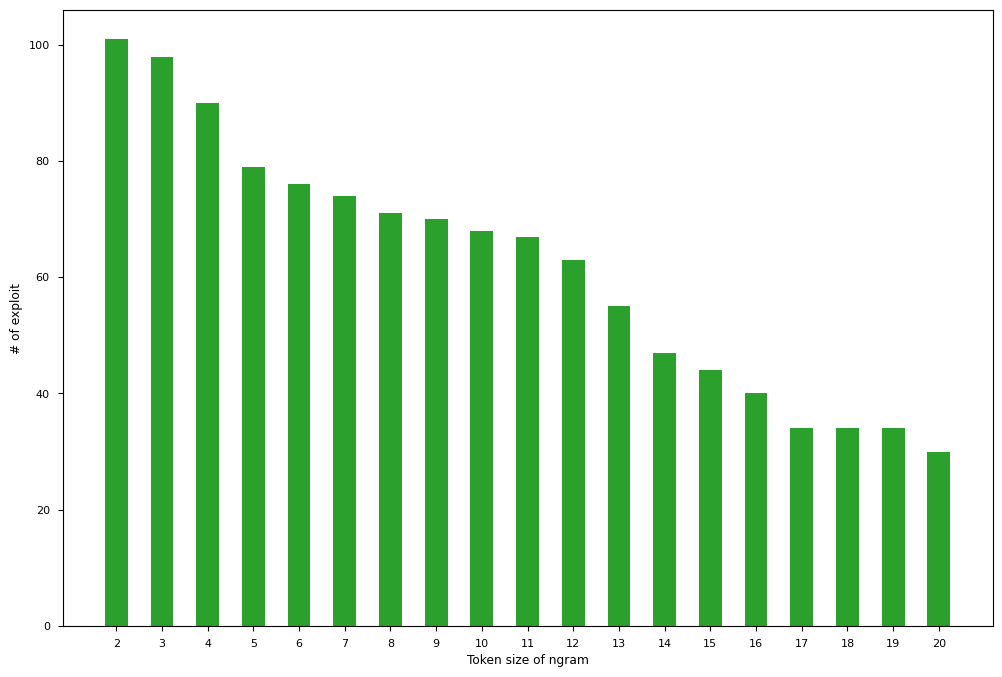

In [7]:
# 그래프로 출력
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

plt.clf()
plt.style.use('default')

token_size = list(ngram_token_size_per_total_enum.keys())
ecnt = list(ngram_token_size_per_total_enum.values())

plt.style.use('seaborn-paper')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

xpos = np.arange(len(token_size))
rects = plt.bar(xpos, ecnt, align='center', width=0.5, color='#2ca02c')
plt.xticks(xpos, token_size)

plt.xlabel("Token size of ngram")
plt.ylabel("# of exploit")
plt.show()

# N-gram token 사이즈 별 N-gram 개수

In [8]:
ngram_token_size_per_ngram = dict()
for ngram in total_ngram_list:
    ngramTokenSize = len(ngram.split(","))
    if not ngramTokenSize in ngram_token_size_per_ngram:
        ngram_token_size_per_ngram[ngramTokenSize] = 0
    ngram_token_size_per_ngram[ngramTokenSize] += 1
print(ngram_token_size_per_ngram)

{2: 423, 3: 461, 4: 451, 5: 441, 6: 432, 7: 434, 8: 437, 9: 443, 10: 449, 11: 459, 12: 470, 13: 485, 14: 493, 15: 502, 16: 505, 17: 511, 18: 513, 19: 516, 20: 519}


In [9]:
# CSV file로 저장
with open("./ngram_token_size_per_ngram.csv", "w", newline = "", encoding = "utf-8") as csvfile:
    f = csv.writer(csvfile)
    f.writerow(["n-gram token size","# ngram"])
    for token_size, ngramCnt in ngram_token_size_per_ngram.items():
        f.writerow([token_size, ngramCnt])

<Figure size 640x440 with 0 Axes>

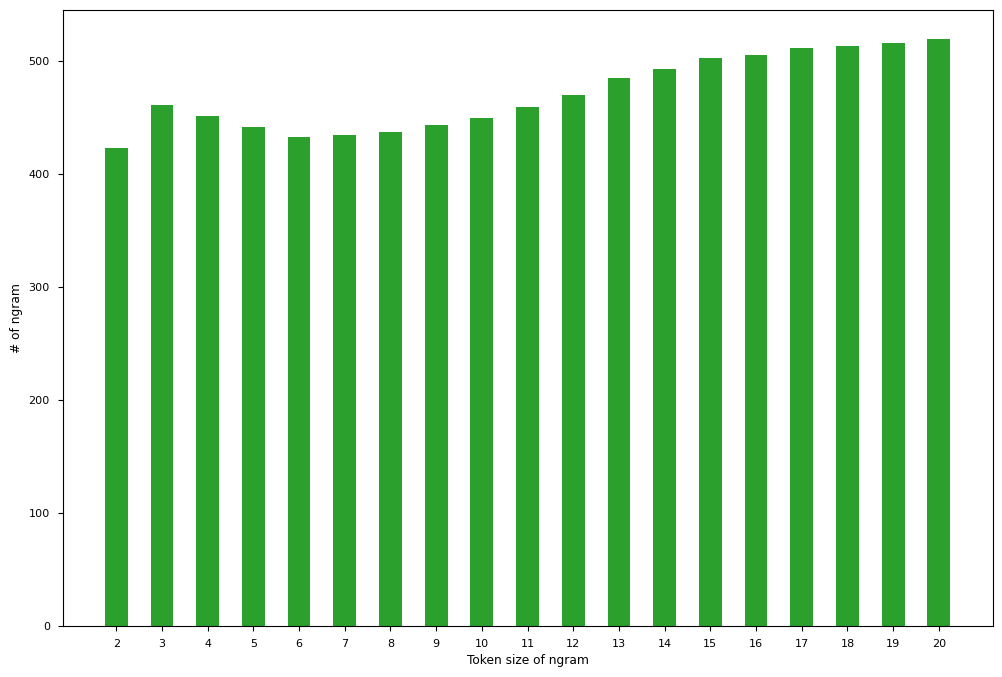

In [10]:
# 그래프로 출력
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

plt.clf()
plt.style.use("default")

token_size = list(ngram_token_size_per_ngram.keys())
ngram_cnt = list(ngram_token_size_per_ngram.values())

plt.style.use('seaborn-paper')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

xpos = np.arange(len(token_size))
rects = plt.bar(xpos, ngram_cnt, align='center', width=0.5, color='#2ca02c')
plt.xticks(xpos, token_size)

plt.xlabel("Token size of ngram")
plt.ylabel("# of ngram")
plt.show()

# 각 ngram token size별 최대 exploit code 개수

In [11]:
ngram_token_size_per_max_exploit = dict()
for L_n in L:
    all_values = L_n.values()
    max_value = max(all_values)
    ngram_token_size_per_max_exploit[len(list(L_n.keys())[0].split(","))] = max_value
    
print(ngram_token_size_per_max_exploit)

{2: 52, 3: 28, 4: 28, 5: 28, 6: 28, 7: 28, 8: 28, 9: 28, 10: 28, 11: 28, 12: 28, 13: 15, 14: 15, 15: 15, 16: 15, 17: 6, 18: 6, 19: 6, 20: 6}


<Figure size 640x440 with 0 Axes>

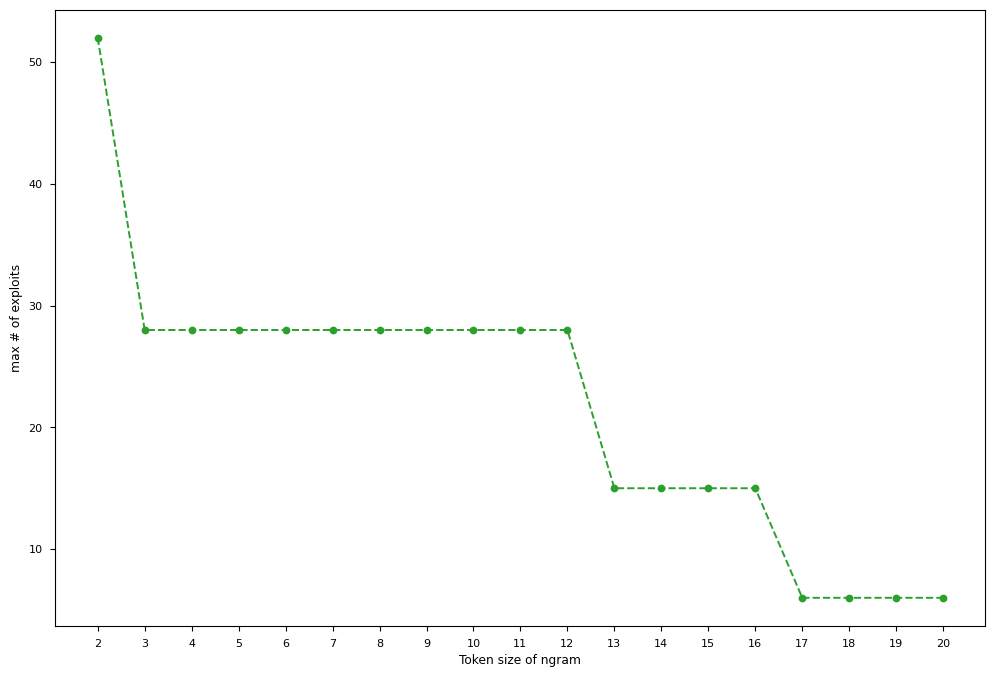

In [12]:
# 그래프로 출력
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

plt.clf()

token_size = list(ngram_token_size_per_max_exploit.keys())
max_exploit_cnt = list(ngram_token_size_per_max_exploit.values())

plt.style.use('seaborn-paper')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

xpos = np.arange(len(token_size))
plt.plot(xpos, max_exploit_cnt, marker='o', linestyle='--', color='#2ca02c')

plt.xlabel("Token size of ngram")
plt.ylabel("max # of exploits")
plt.xticks(xpos, np.arange(2,2+len(token_size)))
plt.show()

# n-gram별 익스프로잇 코드 개수 분포

In [13]:
ngram_token_size_per_exploit_distribution = dict()
for L_n in L:
    all_values = L_n.values()
    ngram_token_size_per_exploit_distribution[len(list(L_n.keys())[0].split(","))] = list(all_values)
    
print(ngram_token_size_per_exploit_distribution)

{2: [28, 2, 2, 2, 2, 2, 3, 6, 2, 11, 2, 2, 2, 2, 2, 10, 3, 2, 2, 7, 5, 2, 5, 2, 3, 2, 10, 3, 2, 3, 2, 2, 9, 2, 2, 2, 5, 31, 3, 2, 2, 7, 5, 6, 2, 2, 9, 5, 10, 5, 6, 50, 4, 2, 16, 2, 2, 7, 2, 8, 10, 5, 5, 2, 34, 2, 4, 2, 5, 3, 2, 2, 6, 8, 2, 3, 3, 2, 11, 2, 3, 3, 2, 2, 3, 2, 4, 2, 5, 7, 2, 11, 2, 5, 2, 2, 2, 2, 3, 7, 2, 3, 2, 2, 3, 2, 3, 3, 4, 28, 3, 5, 7, 3, 5, 36, 2, 3, 4, 31, 2, 9, 5, 2, 7, 9, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 10, 2, 2, 2, 2, 10, 2, 3, 2, 5, 5, 2, 14, 5, 2, 3, 7, 2, 2, 8, 3, 4, 2, 3, 2, 3, 2, 2, 5, 3, 3, 3, 2, 2, 2, 4, 2, 4, 2, 5, 2, 2, 2, 2, 6, 2, 2, 28, 2, 2, 2, 5, 5, 4, 2, 12, 5, 4, 15, 5, 2, 4, 6, 3, 2, 4, 14, 2, 2, 2, 3, 2, 2, 2, 13, 6, 6, 2, 6, 7, 6, 28, 5, 3, 2, 14, 2, 3, 4, 2, 5, 2, 4, 3, 5, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 8, 5, 2, 2, 2, 28, 2, 2, 2, 2, 2, 36, 8, 2, 2, 2, 3, 2, 5, 2, 2, 9, 6, 5, 2, 2, 3, 2, 2, 4, 2, 33, 4, 13, 2, 6, 2, 5, 2, 4, 2, 2, 2, 10, 23, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 6, 2, 2, 2, 3, 2, 2, 2, 15, 2, 2, 4, 7, 3, 2, 10, 3, 10, 2, 2, 3, 3

<Figure size 640x440 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

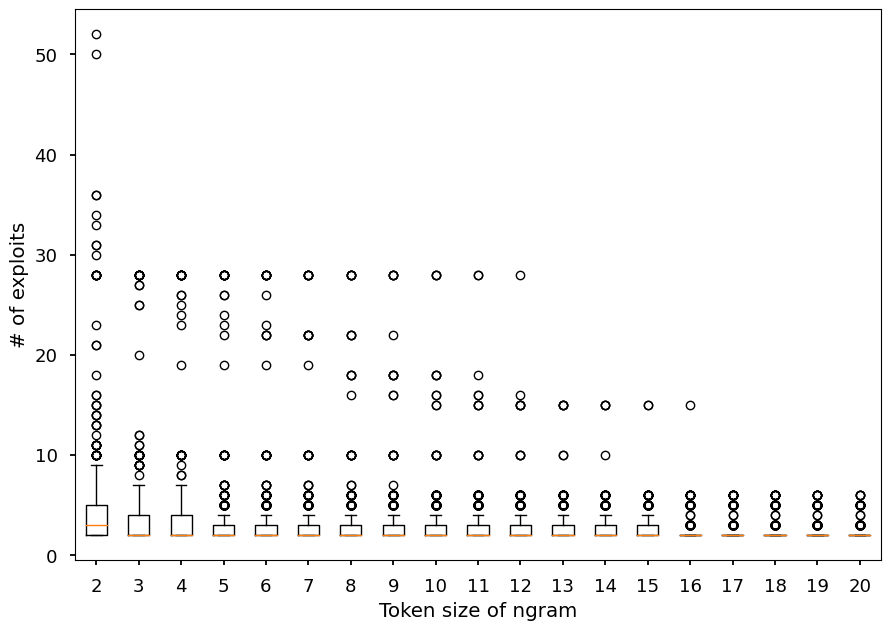

In [14]:
# 그래프로 출력
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import seaborn as sns

plt.clf()
plt.style.use("default")

token_size = list(ngram_token_size_per_exploit_distribution.keys())
exploit_distribution = list(ngram_token_size_per_exploit_distribution.values())

plt.style.use("seaborn-talk")
fig = plt.figure(figsize=(30, 20))

xpos = np.arange(len(token_size))+1
fig, ax = plt.subplots()
distribution = [ ngram_token_size_per_exploit_distribution[i] for i in token_size]
ax.boxplot(distribution, positions=xpos)


ax.set_xlabel("Token size of ngram")
ax.set_ylabel("# of exploits")
ax.set_xticklabels(token_size)
plt.show()